# Problem
 Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

While there is no cure for diabetes, various strategies can help manage the disease. These include maintaining a healthy weight, eating a balanced diet, staying physically active, and receiving medical treatments such as insulin therapy or oral medications.\
Early diagnosis of diabetes is important as it can allow us for timely modification in our lifestyle. Predictive models for diabetes can play a significant role in identfying individuals at risk and facilitating prevention measures.



# Importing data from kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

diabetes-health-indicators-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


## About the dataset
The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

Important Risk Factors\
Research in the field has identified the following as important risk factors for diabetes and other chronic illnesses like heart disease:


1. blood pressure (high)
2. cholesterol (high)
3. smoking
4. diabetes
5. obesity
6. age
7. sex
8. race
9. diet
10. exercise
11. alcohol consumption
12. BMI
13. Household Income
14. Marital Status
15. Sleep
16. Time since last checkup
17. Education
18. Health care coverage
19. Mental Health
20. diabetes






# Importing the libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

In [9]:
# Extracting the zip file
zip = zipfile.ZipFile('/content/diabetes-health-indicators-dataset.zip')
zip.extractall('/content')
zip.close()

In [10]:
# Reading the data
diabetics_csv = pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')
diabetics_csv.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Data Preprocessing

In [11]:
#checking information of dataset
diabetics_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In the dataset we got all float datatype for all features with no null value entries also with 253680 entries with 22 columns in total.

In [12]:
# Lets check its statistical summary
diabetics_csv.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Most features are binary, representing yes/no of certain health factors. Some features are continuous like BMI, Age, Education, Income.

In [13]:
#Checking the duplicate values
diabetics_csv[diabetics_csv.duplicated()].count()

Diabetes_binary         24206
HighBP                  24206
HighChol                24206
CholCheck               24206
BMI                     24206
Smoker                  24206
Stroke                  24206
HeartDiseaseorAttack    24206
PhysActivity            24206
Fruits                  24206
Veggies                 24206
HvyAlcoholConsump       24206
AnyHealthcare           24206
NoDocbcCost             24206
GenHlth                 24206
MentHlth                24206
PhysHlth                24206
DiffWalk                24206
Sex                     24206
Age                     24206
Education               24206
Income                  24206
dtype: int64

This dataset cotains 24206 duplicate values that can further removed for modelling

In [14]:
diabetics_csv.drop_duplicates(inplace = True)

In [15]:
# After deleting duplicates file shape
diabetics_csv.shape

(229474, 22)

In [16]:
# checking columns relevancy
diabetics_csv.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Every column seems alright


# Lets analyze the data

## Visualizing every Binary valued features

In [17]:
# lets create a bar chart for all binary values
colunms_binary = diabetics_csv.columns[diabetics_csv.max() == 1]

In [18]:
colunms_binary

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'],
      dtype='object')

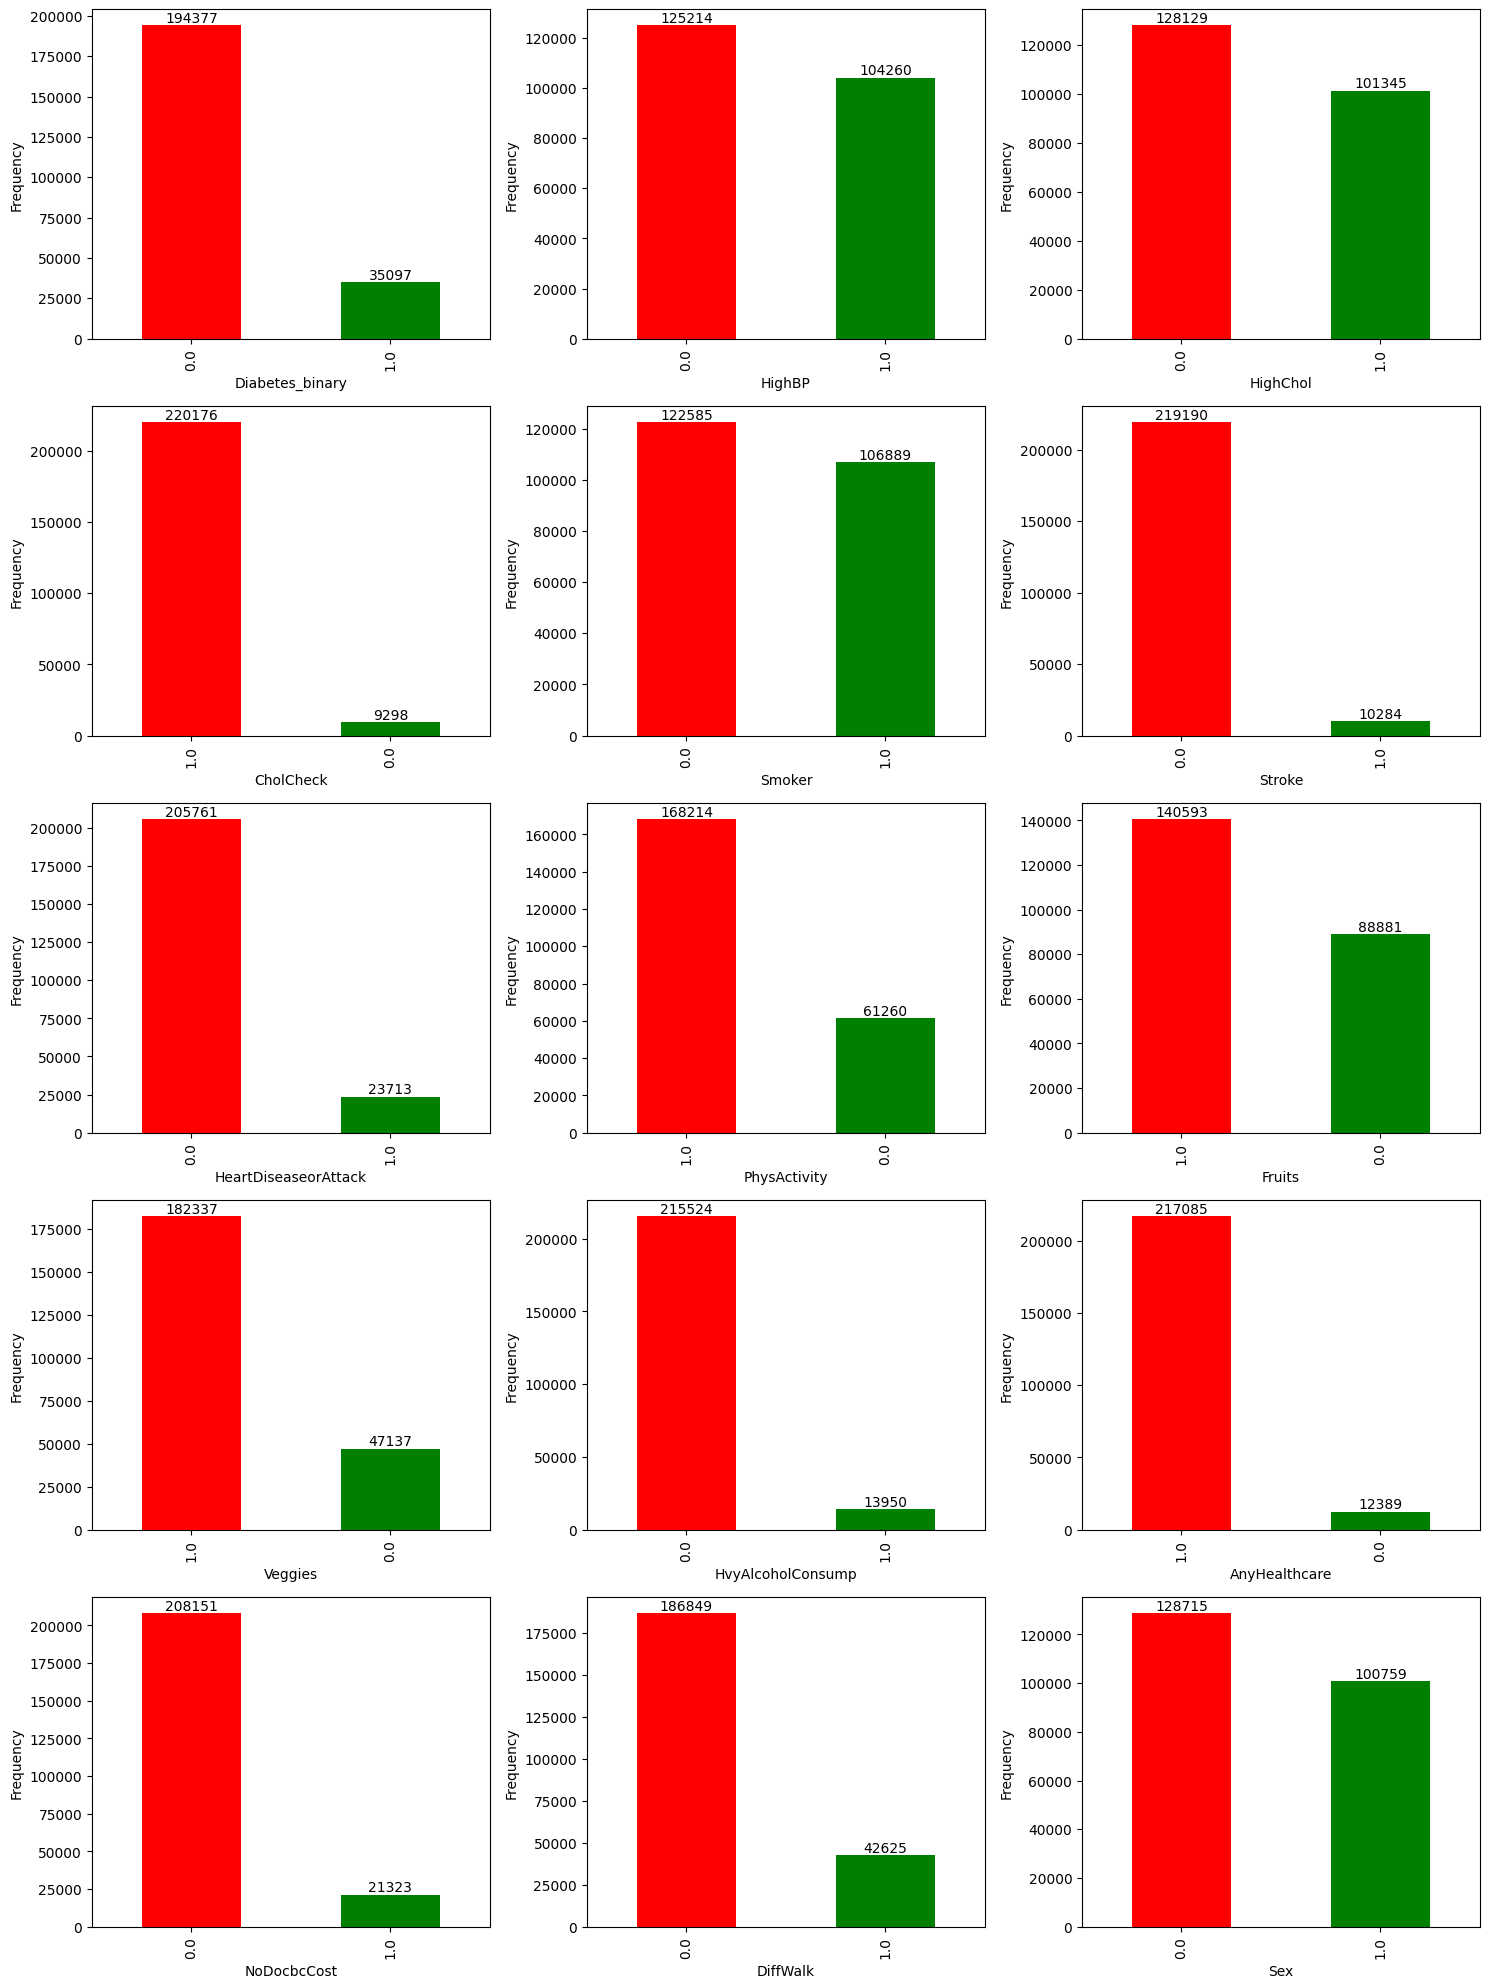

In [19]:
# Plotting bar plot for binary columns
fig, axes = plt.subplots(5,3 ,figsize=(15, 20))

# Flatten the axes array
axes = axes.flatten()

# plotting bar plot
for i, col in enumerate(colunms_binary):
    diabetics_csv[col].value_counts().plot(kind='bar', ax=axes[i],color = ['red','green'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    for index, value in enumerate(diabetics_csv[col].value_counts()):
        axes[i].text(index, value, str(value), ha='center', va='bottom')


plt.tight_layout()
plt.show()

from the above visualization we can say that the diabetics data is unbalanced data as patient with diabeties are lower than that with don't.\
Non Diabetics patient are more than 5 times of diabetic patient.\
Same with other features like 'NoDocbcCost' , 'AnyHealthCare' , 'HvyAlcholConsumption' , 'stroke' and 'HeartDiseaseAttack'

## Visualizing Age Distribution

In [20]:
# Age distribution and affect of diabetes on each age group
diabetics_csv.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


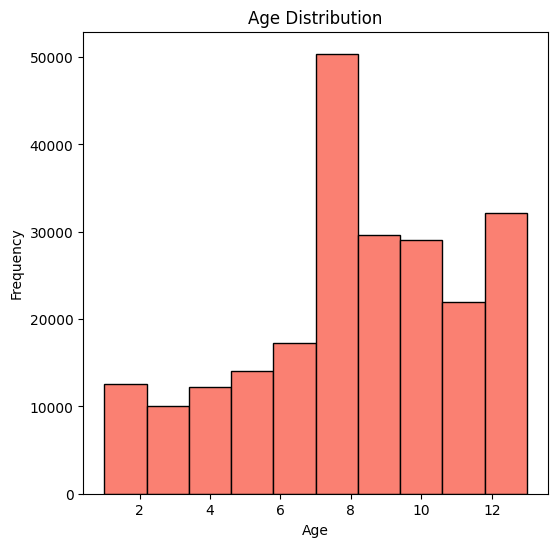

In [21]:
plt.figure(figsize=(6, 6))
#Plotting the histogram
plt.hist(diabetics_csv['Age'], bins=10, color='salmon',edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This is a normalized age, 1 is 18-24 all the way up to 13 with 80 and older with 5 year increments.\
Its looks like age group of 65-69 are the largest in the count.

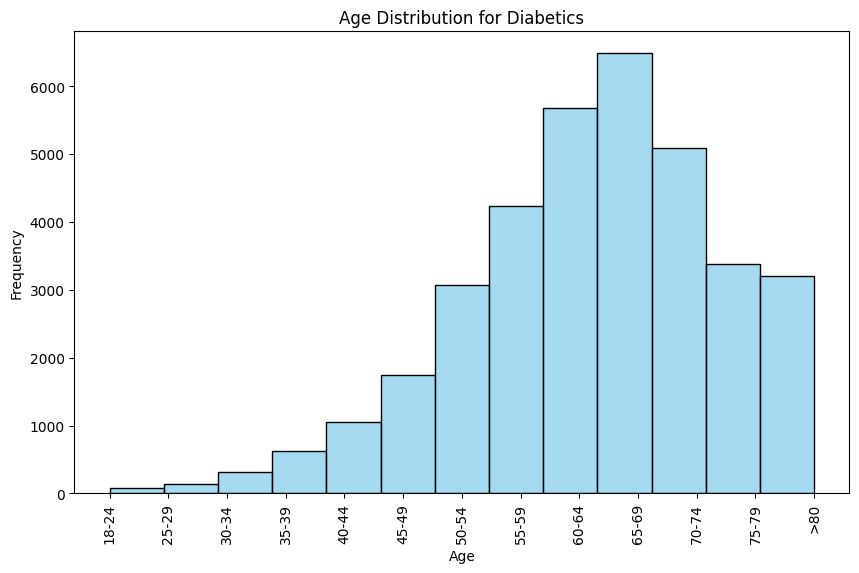

In [22]:
diabetes = diabetics_csv[diabetics_csv['Diabetes_binary'] == 1.0]

# Plotting age distribution using hitogram plot
plt.figure(figsize=(10, 6))
sns.histplot(data=diabetes, x='Age', bins=13, kde=False, color='skyblue')
plt.title('Age Distribution for Diabetics')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.xticks(ticks=sorted(diabetes['Age'].unique()), labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation=90)
plt.show()

Again age group of 65-69 are the one more prone to diabetes.

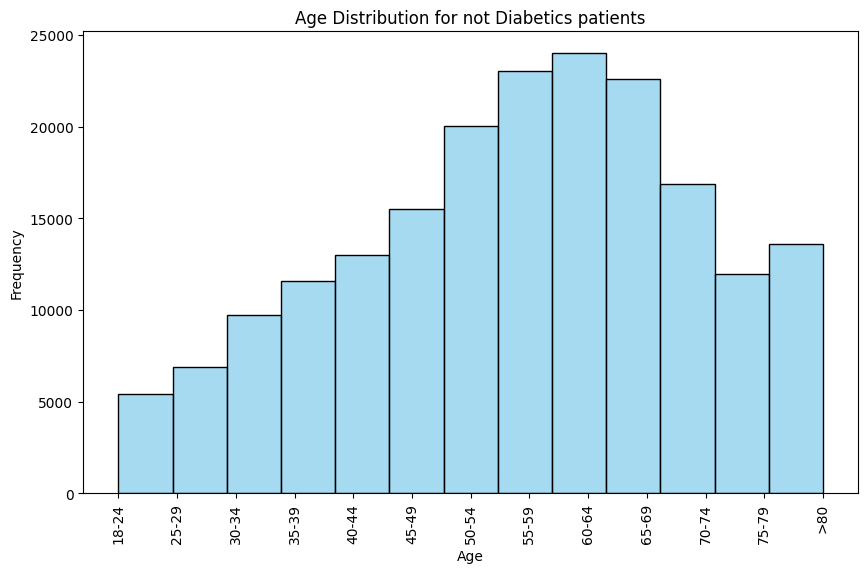

In [23]:
#people with no diabities
diabetes = diabetics_csv[diabetics_csv['Diabetes_binary'] == 0.0]

# Plotting age distribution using hitogram plot
plt.figure(figsize=(10, 6))
sns.histplot(data=diabetes, x='Age', bins=13, kde=False, color='skyblue')
plt.title('Age Distribution for not Diabetics patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.xticks(ticks=sorted(diabetes['Age'].unique()), labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation=90)
plt.show()

## Impact of each feature on diabetes

In [24]:

def donut_impact(ax,data,title):
  ax.pie(data.values,labels = data.index, autopct = '%1.1f%%',wedgeprops = dict(width = 0.4),startangle = 90,colors = ['#27ae60','#8e44ad'],shadow = True)
  ax.set_title(title)

def impact(data):
    df_diabetes = diabetics_csv[diabetics_csv['Diabetes_binary'] == 1.0][data].value_counts()
    df_not_diabetes = diabetics_csv[diabetics_csv['Diabetes_binary'] == 0.0][data].value_counts()

    # Plot the impacts
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot donut chart for diabetics
    donut_impact(axes[0], df_diabetes, f'Impact of {data} on Diabetes')

    # Plot donut chart for non-diabetics
    donut_impact(axes[1], df_not_diabetes, f'Impact of {data} on Non-Diabetic Patients')
    plt.show()


### Stroke

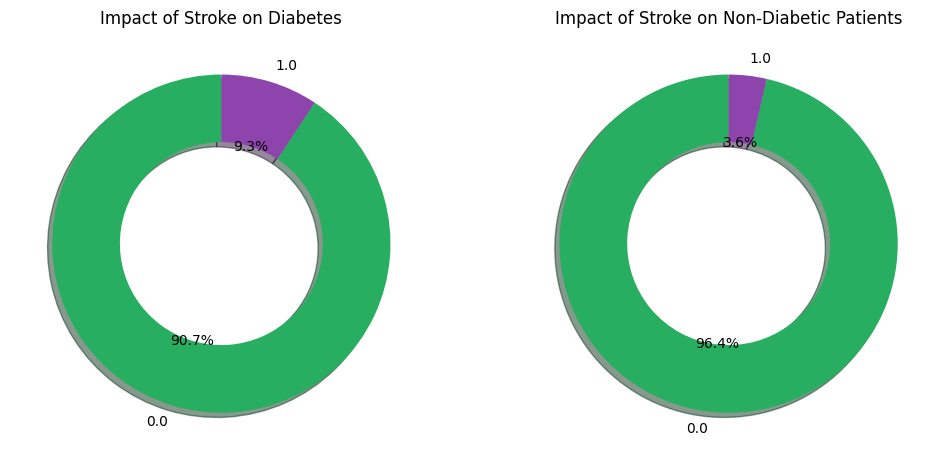

In [25]:
# stroke impact
impact('Stroke')

About 9 percent with diabetics have past history with strokes where as only 3 percent of non diabetics patient has history with strokes

### BP

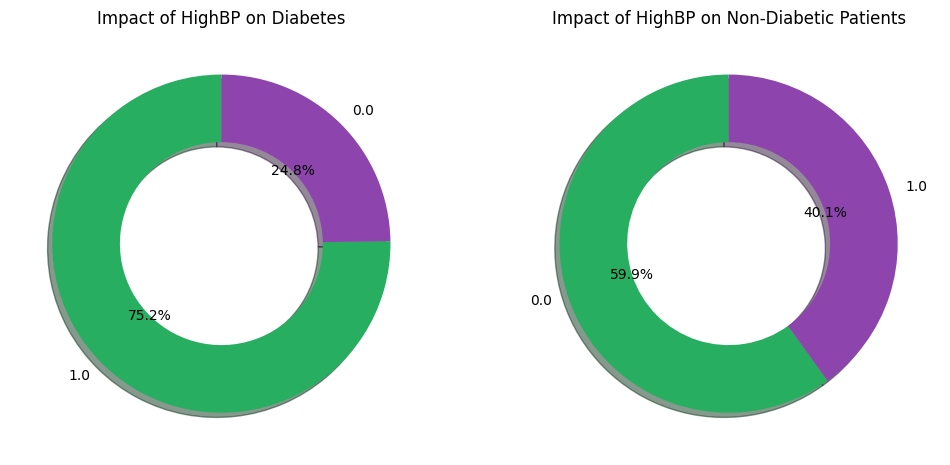

In [26]:
#Bp
impact('HighBP')

Patient with diabetes are more prone to highbp nearly as 75 percent than non diabetes patient which are nearly half 37% cases.

### High Chelostrol

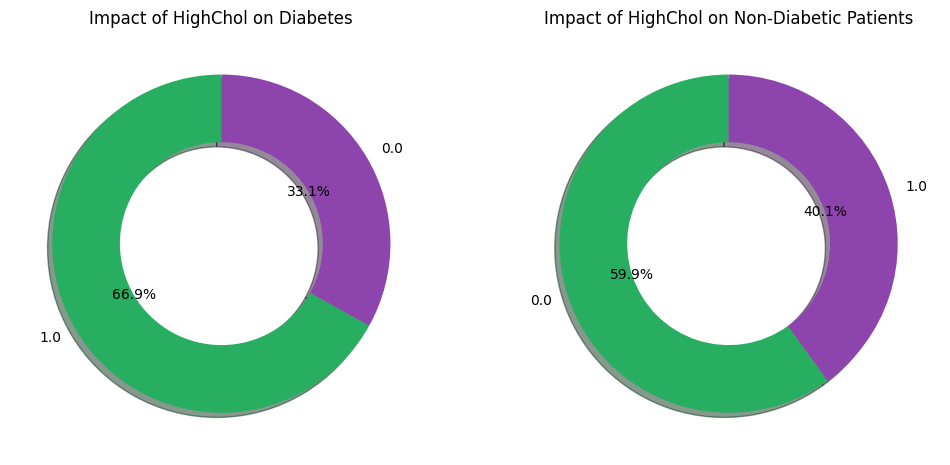

In [27]:
# High Cholestrol
impact('HighChol')

Diabetes patient are more prone to high chelestrol which are nearly double than non diabetic patient.

### Gender

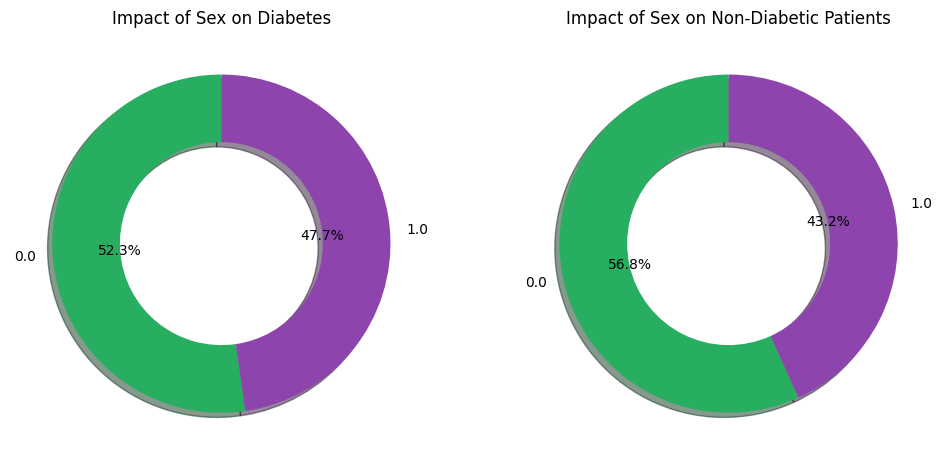

In [28]:
# Gender
impact('Sex')

Their is very less impact of gender on diabetes.

### Heart Problems

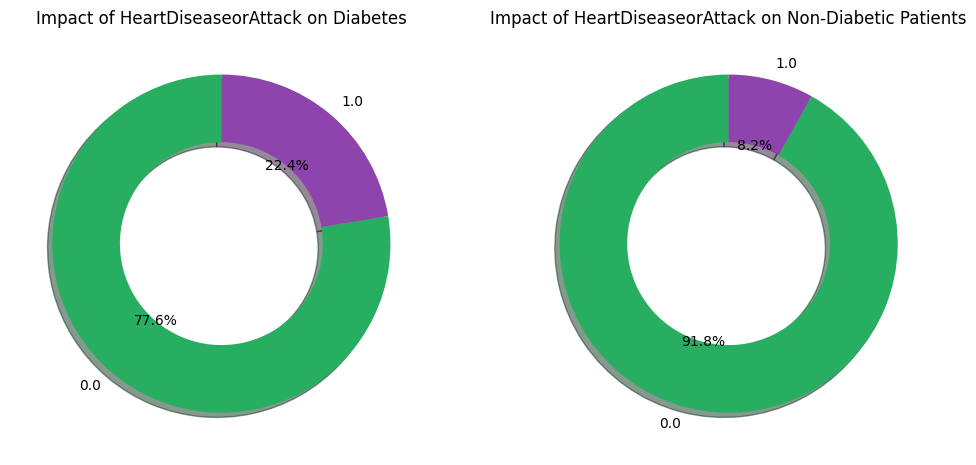

In [29]:
# Heart Problems
impact('HeartDiseaseorAttack')

Patient with diabetes are nearly thrice who sufferd with heart problems than non diabetes patients.

### Heavy Alchol Consumption

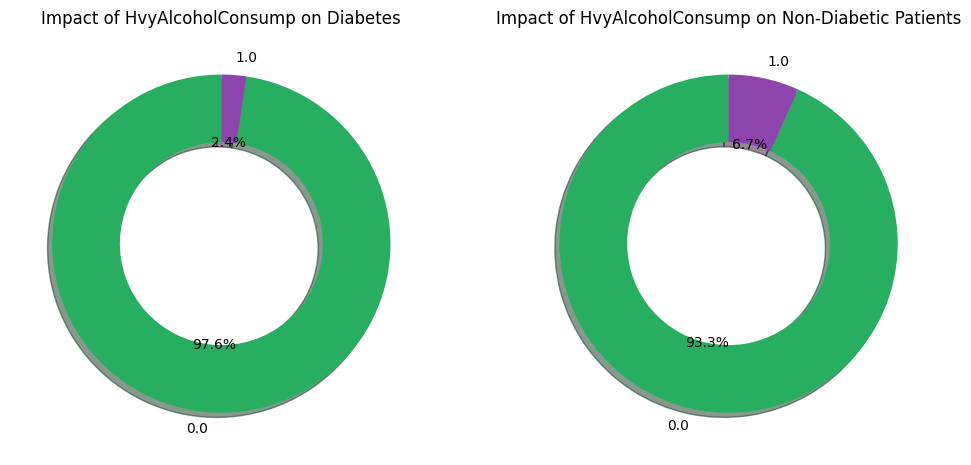

In [30]:
# Heavy Alchol Consumption
impact('HvyAlcoholConsump')

It looks like people with diabetes are less than non diabetes in term of alchol consmption.

### Smoker

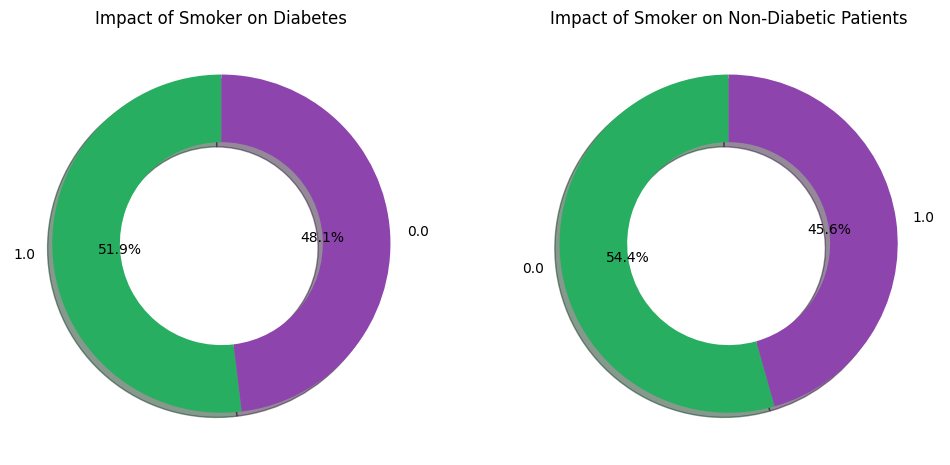

In [31]:
# Smoker
impact('Smoker')

Diabetes patient are more likely a smoker than that who are not diabetics.

In [32]:
# Impact of non binary values
def impacts(data):
    df = diabetics_csv[diabetics_csv['Diabetes_binary'] == 1.0][data].value_counts()
    df_not = diabetics_csv[diabetics_csv['Diabetes_binary'] == 0.0][data].value_counts()

    # Plotting bar chart
    plt.bar(df.index, df.values)
    plt.xlabel(data)
    plt.title(f'Impact of {data} on Diabetes')
    plt.show()

    plt.bar(df_not.index, df_not.values)
    plt.xlabel(data)
    plt.title(f'Impact of {data} on not Diabetics patient')
    plt.show()

### Education

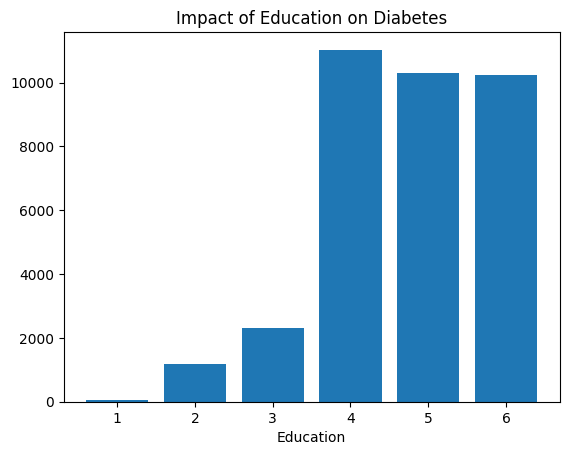

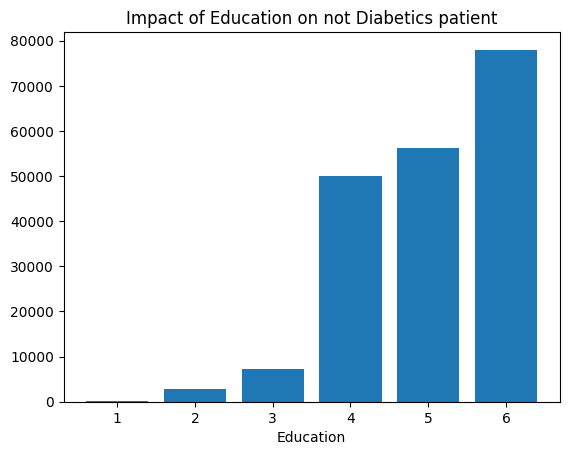

In [33]:
# If we check the impact of eduction on diabetes
impacts('Education')


These are the people with degree greater or equal to a high school graduate

### Income

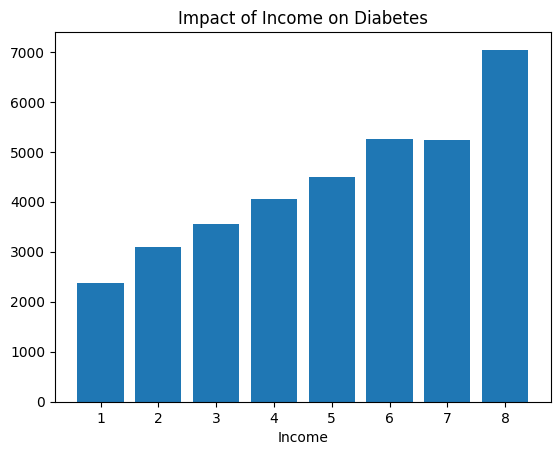

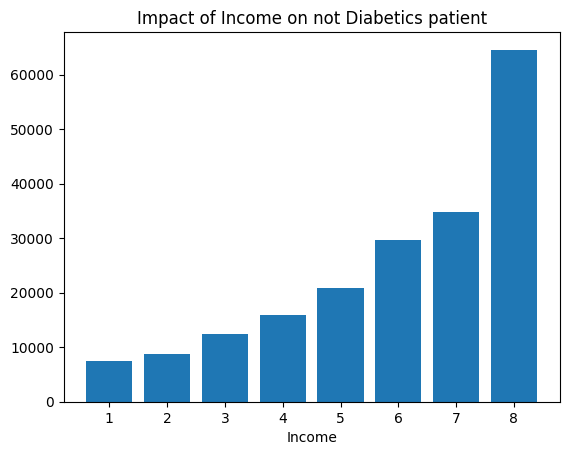

In [34]:
# Income
impacts('Income')

Diabetes patient are mostly those are poor and very low salary

## Correlation Matrix

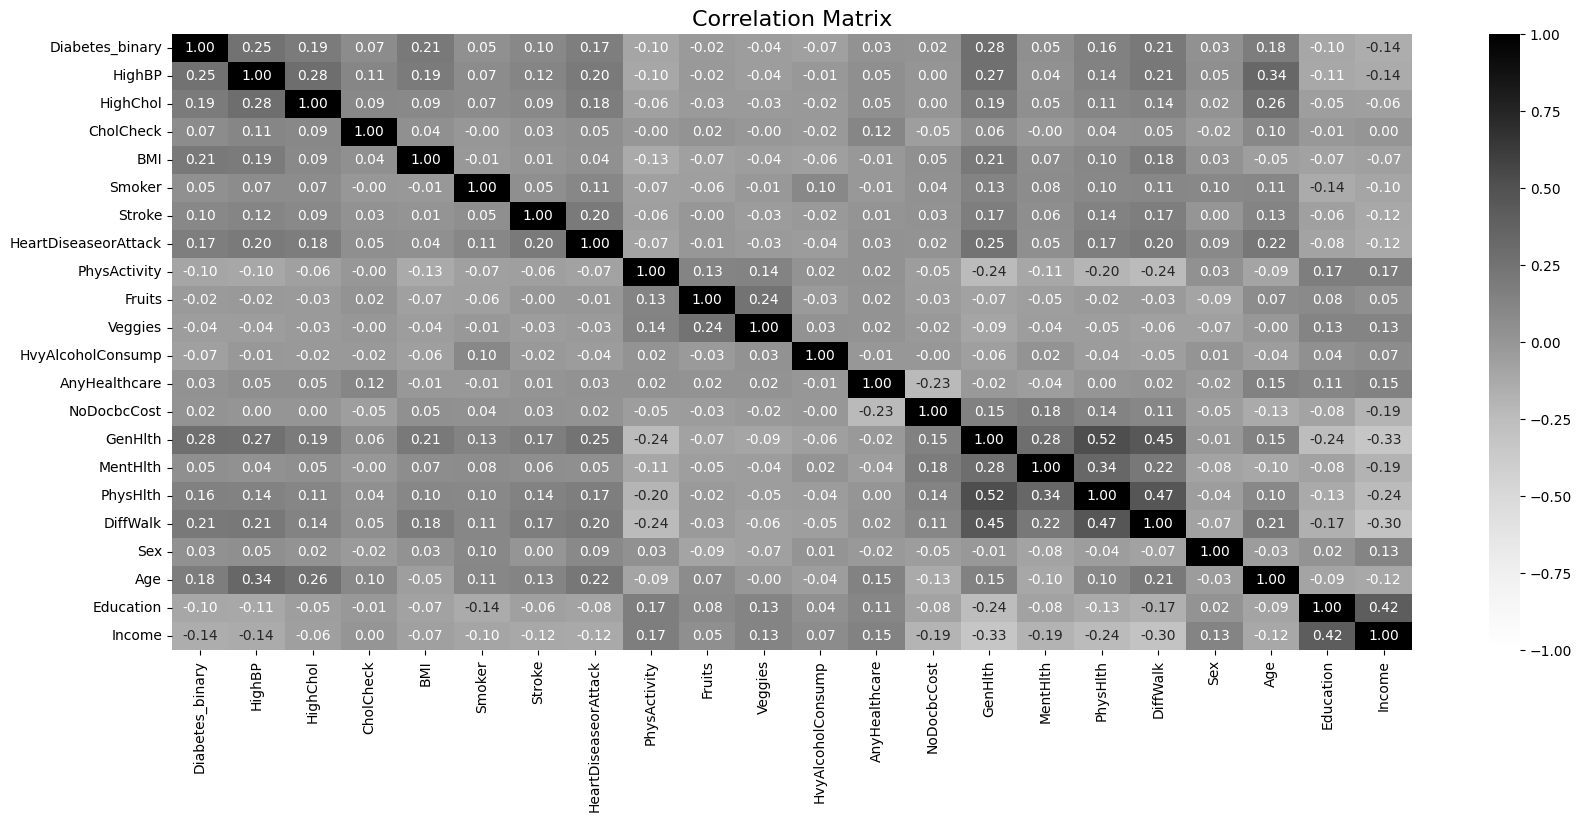

In [35]:
# checking the correlation between attributes
plt.figure(figsize=(20, 8))
sns.heatmap(diabetics_csv.corr(),vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Almost every attribute is less correlated to each other accept gentle health with physical health which are 52% correlated to each other.

# Standard Scaling

In [36]:
# Divide the data to two dependent and independent featrues
X = diabetics_csv.drop(columns = ['Diabetes_binary'])
y = diabetics_csv['Diabetes_binary']

In [37]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)


# PCA(principal component analysis)

In [38]:
# Applying PCA and finding top 10 best features
pca = PCA(n_components = 10 )

In [39]:
pca.fit(X)

PCA(n_components=10)

In [40]:
# Tranform the data
new_X = pca.transform(X)

In [41]:
#Shape of new data
new_X.shape

(229474, 10)

In [42]:
new_X # A numpy array

array([[18.17532013,  4.44751406, 10.15403857, ...,  0.1552687 ,
        -0.11041209, -0.19416089],
       [-5.9776955 , -2.23273544, -1.68800045, ...,  0.46120116,
        -0.8213995 ,  0.46691797],
       [35.03983885, -9.28838866,  4.7887457 , ..., -0.58566675,
        -0.08830034, -0.88653422],
       ...,
       [-5.78343323,  0.19726139,  0.30131544, ..., -0.26934338,
        -0.05634421, -0.26702788],
       [-6.24317056, -3.91551494, -2.68093549, ...,  0.04635764,
         0.14743818, -0.03514274],
       [-6.06999746, -2.1914604 , -1.90142275, ...,  0.11036755,
         0.44680989, -0.89365039]])

In [43]:
# creating a pca df
pca_df = pd.DataFrame(data = new_X, columns = ['a','b','c','d','e','f','g','h','i','j'])


In [44]:
final_df = pd.concat([pca_df.reset_index(drop=True), diabetics_csv['Diabetes_binary'].reset_index(drop=True)], axis =1)

In [45]:
final_df.shape

(229474, 11)

### Correlation matrix

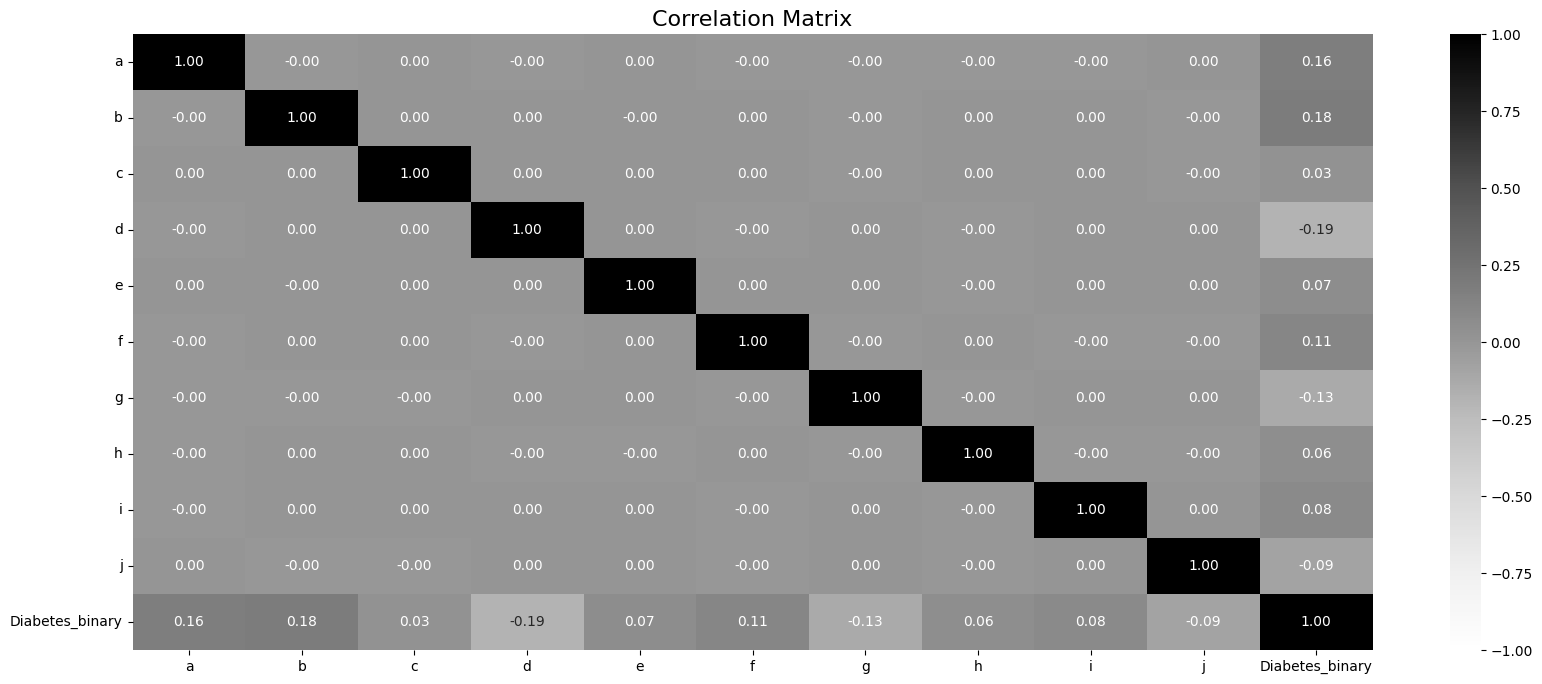

In [46]:
# Lets see the correlation between all five of them

plt.figure(figsize=(20, 8))
sns.heatmap(final_df.corr(),vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

This tells that all colunms no consistent linear relationship also they are independent to each other.\
No multicollinearity issue and every colunm has their own importance in dataset.

In [47]:
# checking the diabetics count
final_df.Diabetes_binary.value_counts()

0.0    194377
1.0     35097
Name: Diabetes_binary, dtype: int64

# Balancing the dataset


In [48]:
# Lets Apply smote to the data
smote = SMOTE(random_state =1)
X_new , y_new = smote.fit_resample(final_df.iloc[:,:-1],y)

In [49]:
# Creating a balance dataset
X_new

,a,b,c,d,e,f,g,h,i,j
0,18.175320,4.447514,10.154039,-2.088507,1.752838,0.895831,-0.714811,0.155269,-0.110412,-0.194161
1,-5.977696,-2.232735,-1.688000,0.430064,5.165934,-1.471352,-1.397749,0.461201,-0.821399,0.466918
2,35.039839,-9.288389,4.788746,-0.737018,-3.940328,1.805433,0.051748,-0.585667,-0.088300,-0.886534
3,-5.979330,-0.433312,-1.131085,-2.964102,0.215219,1.094983,1.550906,-0.908154,0.121152,-0.214600
4,-4.721096,-4.467339,-0.523822,-3.337958,1.586703,-0.800478,0.113443,-0.390881,0.579317,-0.713551
...,...,...,...,...,...,...,...,...,...,...
388749,-5.310664,4.580642,2.392614,2.909298,-1.522909,0.140877,-1.064099,-0.124127,0.456264,-0.109364
388750,3.572827,7.215807,-2.776725,-1.824034,1.743599,-0.041535,-1.026042,-0.295743,0.541147,-0.265339
388751,10.374061,5.561780,-1.807568,-0.827247,1.413446,0.762926,-0.170394,0.311448,-0.046255,-0.369133
388752,-5.616197,0.443002,-0.604405,-0.876352,-0.589974,1.357330,0.103891,-0.216439,0.552702,-0.195544


In [50]:
y_new.value_counts()

0.0    194377
1.0    194377
Name: Diabetes_binary, dtype: int64

Now dataset is balanced

# Applying ML Techniques


## Logistic Regression

### Modelling

In [51]:
# Splitting the data for training and testing the model
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,random_state = 100,test_size = 0.2)

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [52]:
# lets check the accuracy of the model
accuracy = accuracy_score(y_test, lr.predict(X_test))
print("Accuracy for Logistic regression when used 10 features is: ",accuracy)

Accuracy for Logistic regression when used 10 features is:  0.7371352136950007


### Hyperparameter tuning

In [53]:
# Applying hyperparameter tuning
lr_param = {'C':[0.001,0.01,0.1,1,10]}
lr_grid = GridSearchCV(LogisticRegression(),lr_param,cv = 5)
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

### Evaluating the model

In [54]:
lr_best = lr_grid.best_estimator_
print(lr_best) # this is the best paramater

LogisticRegression(C=0.001)


In [55]:
lr_new = accuracy_score(y_test, lr_best.predict(X_test))
print("After Hyperparameter tuning: ", lr_new)

After Hyperparameter tuning:  0.7374567529678074


In [56]:
y_pred = lr_best.predict(X_test)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)
lr_roc_auc = roc_auc_score(y_test, y_pred)

In [57]:
print("Evaluating Logistic Regression performance:")
print('Accuracy Score :',lr_new)
print('Precision Score:',lr_precision)
print('Recall Score   :',lr_recall)
print('F1 Score       :',lr_f1)
print('ROC AUC Score  :',lr_roc_auc)

Evaluating Logistic Regression performance:
Accuracy Score : 0.7374567529678074
Precision Score: 0.7267464774854665
Recall Score   : 0.759936120341035
F1 Score       : 0.742970825621073
ROC AUC Score  : 0.7374870696238673


### Confusion Metrics

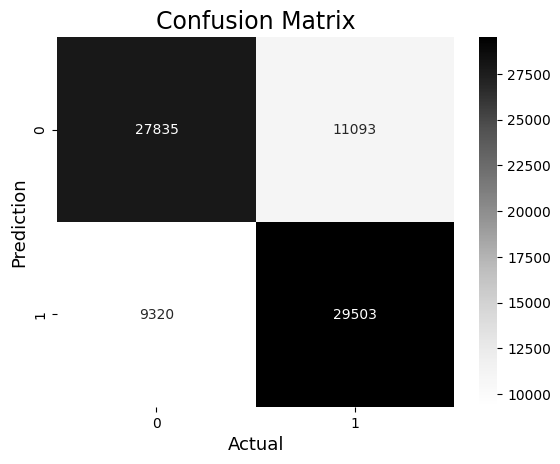

In [58]:
#Confusion metrics
matrix = confusion_matrix(y_test,lr_best.predict(X_test))

sns.heatmap(matrix,
            annot=True,
            fmt='g',cmap = 'Greys')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Decision Tree

### Modelling

In [59]:
dt = DecisionTreeClassifier()
# Training Decision Tree
dt.fit(X_train, y_train)

# Make predictions
predictions = dt.predict(X_test)

In [60]:
# checking accuracy of model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of Decision Tree on 10 attributes:", accuracy)

Accuracy of Decision Tree on 10 attributes: 0.7875654332420162


### HyperParameter Tuning

In [61]:
# Applying hyper parameter tuning
dt_param = {'max_depth':[None,5,10,15],
            'min_samples_split':[2,5,10]}

dt_grid = GridSearchCV(dt,dt_param,cv = 5)
dt_grid.fit(X_train,y_train)
dt_best = dt_grid.best_estimator_

### Evaluating the model

In [62]:
dt_new = accuracy_score(y_test,dt_best.predict(X_test))

In [63]:
print("Accuracy hyperparameter tuning :", dt_new)

Accuracy hyperparameter tuning : 0.787655464238402


In [64]:
y_pred = dt_best.predict(X_test)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)
dt_roc_auc = roc_auc_score(y_test, y_pred)

In [65]:
print("Evaluating Decision Tree performance:")
print('Accuracy Score :',dt_new)
print('Precision Score:',dt_precision)
print('Recall Score   :',dt_recall)
print('F1 Score       :',dt_f1)
print('ROC AUC Score  :',dt_roc_auc)

Evaluating Decision Tree performance:
Accuracy Score : 0.787655464238402
Precision Score: 0.7767194979785202
Recall Score   : 0.8066094840687221
F1 Score       : 0.7913823603740207
ROC AUC Score  : 0.7876810264568848


### Confusion Metrics

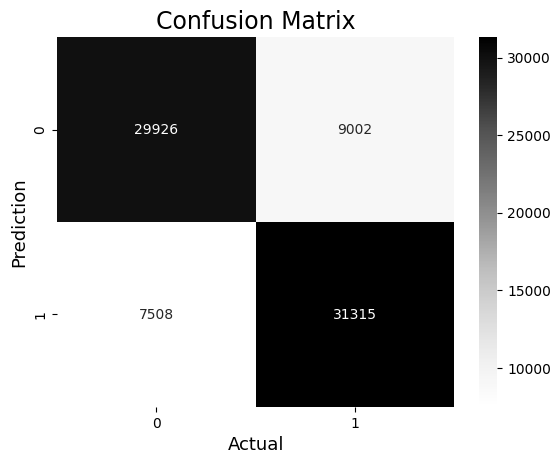

In [66]:
#confusion metrics

matrix = confusion_matrix(y_test,dt_best.predict(X_test))

sns.heatmap(matrix,
            annot=True,
            fmt='g',cmap = 'Greys')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Random Forest

### Modelling

In [67]:
# train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
# Check the accuracy of model
accuracy = accuracy_score(y_test, rf.predict(X_test))
print("Random Forest Accuracy with 10 attributes:", accuracy)

Random Forest Accuracy with 10 attributes: 0.869210685393114


### Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning
rf_param = {
            'max_depth' : [5,10]
            }

rf_grid = GridSearchCV(rf,rf_param,cv = 5)
rf_grid.fit(X_train,y_train)
rf_best = rf_grid.best_estimator_

In [ ]:
rf_new = accuracy_score(y_test,rf_best.predict(X_test))
print('Random Forest Accuracy with 10 attribures:',rf_new)

Random Forest Accuracy with 10 attribures: 0.7587683759694409


### Evaluating the model

In [ ]:
y_pred = rf_best.predict(X_test)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
print("Evaluating Random Forest performance:")
print('Accuracy Score :',rf_new)
print('Precision Score:',rf_precision)
print('Recall Score   :',rf_recall)
print('F1 Score       :',rf_f1)
print('ROC AUC Score  :',rf_roc_auc)

Evaluating Random Forest performance:
Accuracy Score : 0.7587683759694409
Precision Score: 0.7321655829881759
Recall Score   : 0.8150323261983875
F1 Score       : 0.7713798147245245
ROC AUC Score  : 0.7588442559886306


### Confusion metrics

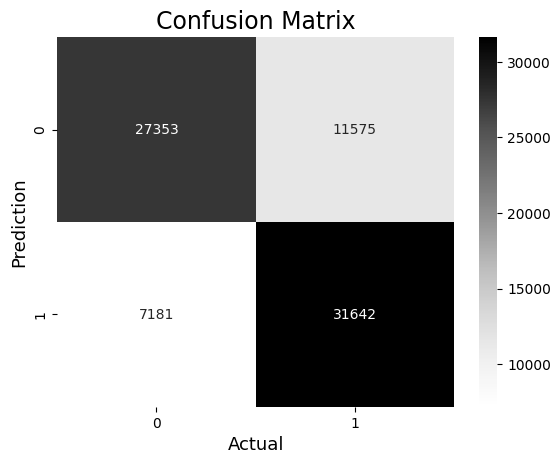

In [ ]:
#Confusion metrics
matrix = confusion_matrix(y_test,rf_best.predict(X_test))

sns.heatmap(matrix,
            annot=True,
            fmt='g',cmap = 'Greys')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Neural Network

In [ ]:
# Build the neural network
model = keras.Sequential([
    layers.Dense(32, activation = 'relu', input_shape = (10,)),
    layers.Dense(64,activation = 'relu')
    layers.Dense(1,activation = 'sigmoid')
])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-139-0fde25493b47>, line 4)

### Training the model

In [ ]:
# compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

# train model
history = model.fit(X_train,y_train,epochs =10 , validation_data = (X_test,y_test))

### Evaluate the model

In [ ]:
# Evaluate the model performance
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy and loss is:", test_accuracy, test_loss)

### Visualization

In [ ]:
# Visualizing the training history
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Conclusion

In conclusion random forest showed good accuracy of 86 percent than other ML models or neural network.
The accuracy of model can be further advanced using various feature selection method and feature enginerring in the dataset.